# Triangular Moving Average

https://www.motivewave.com/studies/triangular_moving_average.htm  

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import seaborn as sns

import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AAPL'
start = '2018-08-01'
end = '2019-01-01'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-08-01,49.782501,50.439999,49.327499,50.375000,48.208725,271742800
2018-08-02,50.145000,52.095001,50.087502,51.847500,49.617912,249616000
2018-08-03,51.757500,52.185001,51.369999,51.997501,49.761459,133789600
2018-08-06,52.000000,52.312500,51.767502,52.267502,50.019852,101701600
2018-08-07,52.330002,52.375000,51.689999,51.777500,49.550926,102349600


In [3]:
n = 14 # number of periods
ma = df['Adj Close'].rolling(n).mean()
df['TMA'] = ma.rolling(window=int(n/2)).mean()

In [7]:
df = df.dropna()
df.head()

,Open,High,Low,Close,Adj Close,Volume,TMA
Date,,,,,,,
2018-08-28,54.752499,55.134998,54.730000,54.924999,52.747410,91107200,50.732553
2018-08-29,55.037498,55.872501,54.852501,55.744999,53.534901,109019200,50.924219
2018-08-30,55.812500,57.064999,55.599998,56.257500,54.027088,195175200,51.123861
2018-08-31,56.627499,57.217499,56.500000,56.907501,54.651321,173360400,51.348921
2018-09-04,57.102501,57.294998,56.657501,57.090000,54.826580,109560400,51.599419


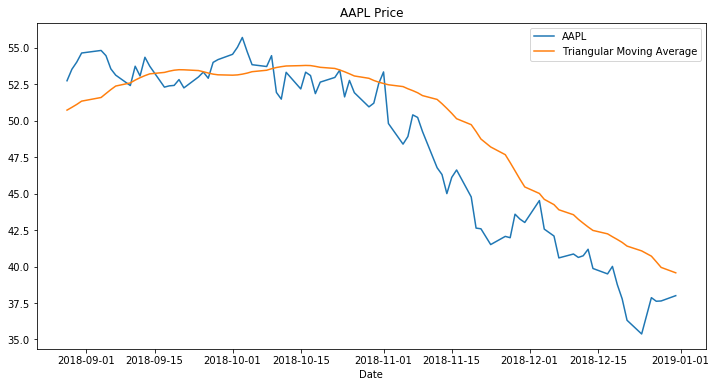

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(df['Adj Close'], label=symbol)
plt.plot(df['TMA'], label='Triangular Moving Average')
plt.title(symbol + ' Price')
plt.xlabel('Date')
plt.legend()
plt.show()

## Candlestick with Triangular Moving Average

In [11]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,TMA,VolumePositive
0,736934.0,54.752499,55.134998,54.730000,54.924999,52.747410,91107200,50.732553,False
1,736935.0,55.037498,55.872501,54.852501,55.744999,53.534901,109019200,50.924219,False
2,736936.0,55.812500,57.064999,55.599998,56.257500,54.027088,195175200,51.123861,False
3,736937.0,56.627499,57.217499,56.500000,56.907501,54.651321,173360400,51.348921,False
4,736941.0,57.102501,57.294998,56.657501,57.090000,54.826580,109560400,51.599419,False


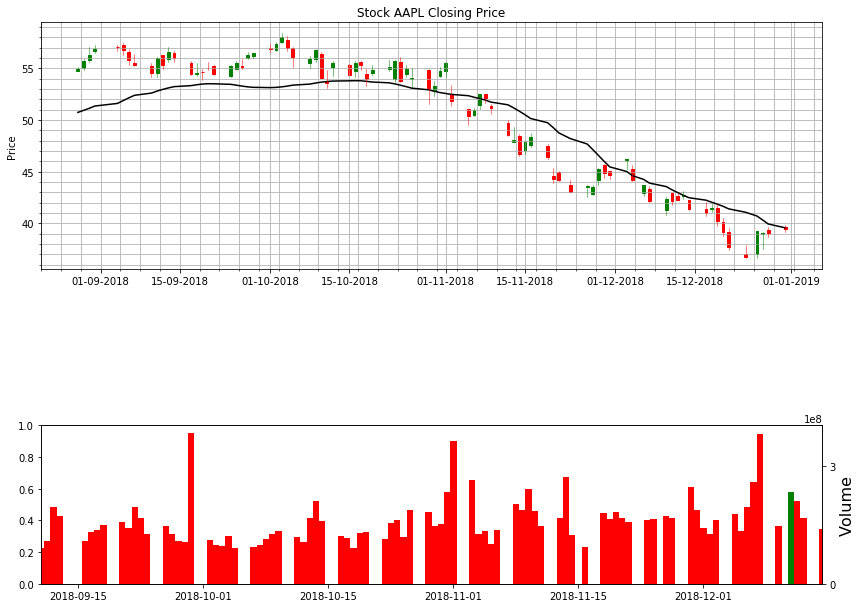

In [18]:
from mplfinance.original_flavor import candlestick_ohlc
import datetime
from matplotlib.dates import num2date

fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(df['TMA'], label='TMA', color='k')
candlesticks=candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

# create the second axis for the volume bar-plot
ax2 = plt.subplot(2, 1, 2)
ax2 = ax2.twinx()

# set the position of ax2 so that it is short (y2=0.32) but otherwise the same size as ax
ax2.set_position(matplotlib.transforms.Bbox([[0.125,0.1],[0.9,0.32]]))

# get data from candlesticks for a bar plot
dates = [x[0] for x in candlesticks]
dates = np.asarray(dates)
volume = [x[5] for x in candlesticks]
volume = np.asarray(volume)

# make bar plots and color differently depending on up/down for the day
pos = dfc['Open']-dfc['Adj Close']<0
neg = dfc['Open']-dfc['Adj Close']>0
ax2.bar(dfc.Date[pos],dfc.Volume[pos],color='green',width=1,align='center')
ax2.bar(dfc.Date[neg],dfc.Volume[neg],color='red',width=1,align='center')

#scale the x-axis tight
ax2.set_xlim(min(dfc.Date),max(dfc.Date))
# the y-ticks for the bar were too dense, keep only every third one
yticks = ax2.get_yticks()
ax2.set_yticks(yticks[::3])

ax2.yaxis.set_label_position("right")
ax2.set_ylabel('Volume', size=16)

# format the x-ticks with a human-readable date. 
xt = ax1.get_xticks()
new_xticks = [datetime.date.isoformat(num2date(d)) for d in xt]
ax2.set_xticklabels(new_xticks, horizontalalignment='right')
plt.show()